Horizontal Edge Tensor:
 [[ 0.8313726   0.07843137  0.09019607 ...  0.1372549  -0.8666667
  -1.3137255 ]
 [ 1.137255    0.12156862  0.14117646 ...  0.16470587 -1.145098
  -1.737255  ]
 [ 1.1960785   0.14509803  0.17254901 ...  0.12941176 -1.1294118
  -1.7098039 ]
 ...
 [ 0.1764706   0.05490196  0.07843138 ...  0.00784314 -0.7450981
  -1.1019609 ]
 [ 0.16862746  0.07058823  0.07058824 ...  0.01176471 -0.73333335
  -1.082353  ]
 [ 0.12156864  0.05882353  0.05490196 ...  0.01176471 -0.54509807
  -0.8039216 ]]

Vertical Edge Tensor:
 [[ 0.8235295   1.137255    1.2039217  ...  1.6509805   1.4078431
   0.6862745 ]
 [ 0.05490193  0.09019604  0.11764696 ... -0.02352938 -0.03137259
  -0.01176471]
 [ 0.09803918  0.14509806  0.17254898 ... -0.02745101 -0.03921561
  -0.01568627]
 ...
 [-0.02745098 -0.02352941 -0.02352943 ... -0.04705879 -0.03921574
  -0.01960786]
 [-0.01960785 -0.01568628 -0.00784316 ... -0.03529409 -0.02745097
  -0.01568629]
 [-0.1137255  -0.1764706  -0.21176471 ... -1.0784315  -

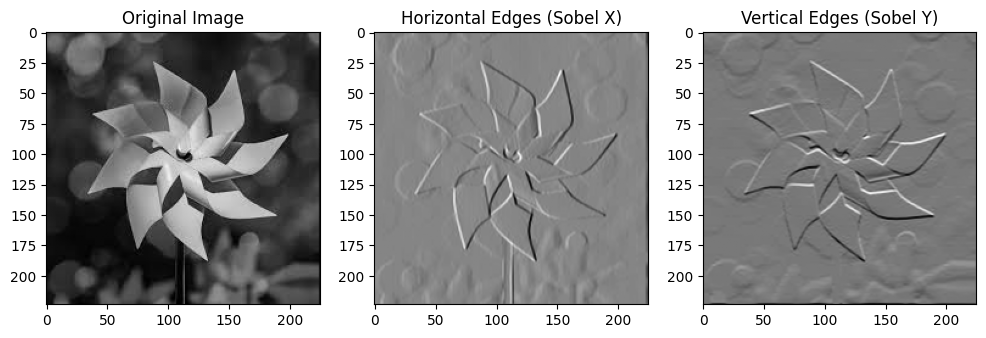

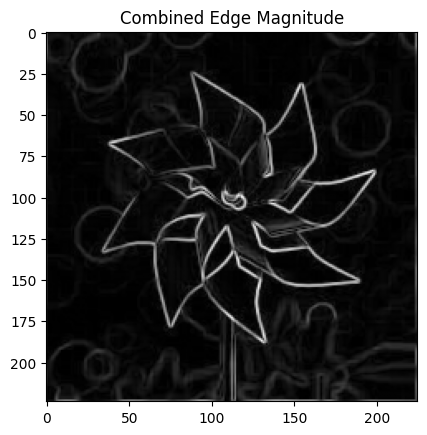

In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# -----------------------------
# 1. Define CNN Model for Edge Detection
# -----------------------------
class EdgeDetectionCNN(nn.Module):
    def __init__(self):
        super(EdgeDetectionCNN, self).__init__()
        # 2 filters (Sobel-X and Sobel-Y)
        self.edge_kernels = nn.Conv2d(1, 2, kernel_size=3, padding=1, bias=False)

        # Define Sobel filters
        sobel_x = torch.tensor([[-1, 0, 1],
                                [-2, 0, 2],
                                [-1, 0, 1]], dtype=torch.float32)
        sobel_y = torch.tensor([[-1, -2, -1],
                                [0, 0, 0],
                                [1, 2, 1]], dtype=torch.float32)

        # Stack and format correctly for Conv2d [out_channels, in_channels, H, W]
        weight = torch.stack([sobel_x, sobel_y]).unsqueeze(1)
        self.edge_kernels.weight.data = weight

    def forward(self, x):
        edges = self.edge_kernels(x)
        return edges


# -----------------------------
# 2. Load Image (Local or URL)
# -----------------------------
# You can either load local file or use a URL
use_url = False  # change to True if you want to load from URL

if use_url:
    url = "https://upload.wikimedia.org/wikipedia/commons/4/47/Cup.png"
    response = requests.get(url)
    image = Image.open(BytesIO(response.content)).convert("L")
else:
    image_path = "images.jpeg"  # local image path
    image = Image.open(image_path).convert("L")

transform = transforms.ToTensor()
img_tensor = transform(image).unsqueeze(0)  # [1, 1, H, W]

# -----------------------------
# 3. Apply CNN (Edge Detection)
# -----------------------------
model = EdgeDetectionCNN()
with torch.no_grad():
    edges = model(img_tensor)

# -----------------------------
# 4. Extract and Combine Edges
# -----------------------------
edge_x = edges[0, 0, :, :].numpy()
edge_y = edges[0, 1, :, :].numpy()
edge_combined = (edge_x**2 + edge_y**2) ** 0.5  # magnitude

# -----------------------------
# 5. Print and Display
# -----------------------------
print("Horizontal Edge Tensor:\n", edge_x)
print("\nVertical Edge Tensor:\n", edge_y)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Horizontal Edges (Sobel X)")
plt.imshow(edge_x, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Vertical Edges (Sobel Y)")
plt.imshow(edge_y, cmap='gray')

plt.show()

plt.figure()
plt.title("Combined Edge Magnitude")
plt.imshow(edge_combined, cmap='gray')
plt.show()
